In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = "./global_unemployment_data.csv"
data = pd.read_csv(data_path)

In [30]:
data.head(10)

,country_name,indicator_name,sex,age_group,age_categories,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,Unemployment rate by sex and age,Female,15-24,Youth,13.340,15.974,18.570,21.137,20.649,20.154,21.228,21.640,30.561,32.200,33.332
1,Afghanistan,Unemployment rate by sex and age,Female,25+,Adults,8.576,9.014,9.463,9.920,11.223,12.587,14.079,14.415,23.818,26.192,28.298
2,Afghanistan,Unemployment rate by sex and age,Female,Under 15,Children,10.306,11.552,12.789,14.017,14.706,15.418,16.783,17.134,26.746,29.193,30.956
3,Afghanistan,Unemployment rate by sex and age,Male,15-24,Youth,9.206,11.502,13.772,16.027,15.199,14.361,14.452,15.099,16.655,18.512,19.770
4,Afghanistan,Unemployment rate by sex and age,Male,25+,Adults,6.463,6.879,7.301,7.728,7.833,7.961,8.732,9.199,11.357,12.327,13.087
5,Afghanistan,Unemployment rate by sex and age,Male,Under 15,Children,7.340,8.355,9.362,10.360,10.137,9.930,10.458,10.970,13.170,14.411,15.296
6,Albania,Unemployment rate by sex and age,Female,15-24,Youth,32.590,40.274,34.102,27.429,25.765,26.005,29.766,28.687,27.004,25.758,25.210
7,Albania,Unemployment rate by sex and age,Female,25+,Adults,13.600,14.499,12.142,10.875,10.312,9.662,10.743,10.736,10.073,9.660,9.488
8,Albania,Unemployment rate by sex and age,Female,Under 15,Children,15.476,17.115,14.477,12.511,11.876,11.324,12.536,12.337,11.475,10.938,10.680
9,Albania,Unemployment rate by sex and age,Male,15-24,Youth,43.556,39.644,37.630,34.023,29.906,27.953,31.426,30.366,29.001,27.731,27.267


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    1134 non-null   object 
 1   indicator_name  1134 non-null   object 
 2   sex             1134 non-null   object 
 3   age_group       1134 non-null   object 
 4   age_categories  1134 non-null   object 
 5   2014            1134 non-null   float64
 6   2015            1134 non-null   float64
 7   2016            1134 non-null   float64
 8   2017            1134 non-null   float64
 9   2018            1134 non-null   float64
 10  2019            1134 non-null   float64
 11  2020            1134 non-null   float64
 12  2021            1134 non-null   float64
 13  2022            1128 non-null   float64
 14  2023            1122 non-null   float64
 15  2024            1122 non-null   float64
dtypes: float64(11), object(5)
memory usage: 141.9+ KB


In [4]:
data.describe()

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
count,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1128.000000,1122.000000,1122.000000
mean,11.387800,11.272444,11.122963,10.863516,10.516499,10.311452,11.851285,11.422645,10.340361,9.985181,9.940089
std,11.119002,10.915942,10.742947,10.640980,10.527773,10.297952,11.231580,10.873412,10.264810,9.987778,9.977512
min,0.027000,0.034000,0.038000,0.035000,0.044000,0.036000,0.056000,0.064000,0.067000,0.063000,0.060000
25%,3.933500,3.993500,3.945250,3.747500,3.672750,3.538500,4.334500,4.153500,3.555250,3.477500,3.459750
50%,7.697500,7.547500,7.504500,7.140500,6.706000,6.627500,8.067500,7.542500,6.571500,6.466000,6.364000
75%,15.050750,14.766250,14.467500,14.142000,13.343000,13.285500,15.316250,14.881500,13.410000,12.914500,12.687750
max,74.485000,74.655000,74.720000,75.416000,76.395000,77.173000,83.990000,82.135000,78.776000,78.541000,78.644000


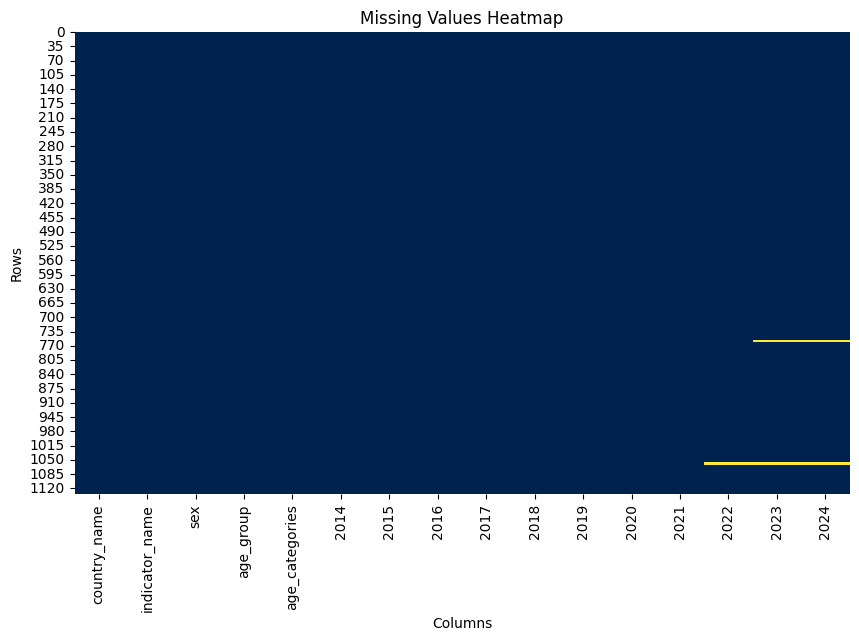

In [109]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cmap='cividis', cbar=False)
plt.title('Missing Values Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [72]:

age_group = data.groupby([ "age_group"]).mean([data.columns[5:]])
new_order = ['Under 15', '15-24', '25+']
reordered_age_group = age_group.reindex(new_order)

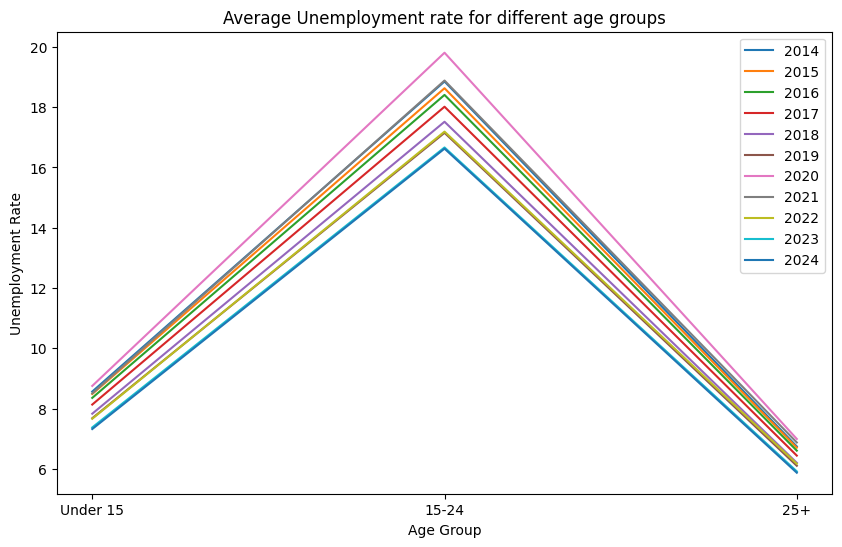

In [120]:
plt.figure(figsize=(10, 6))
plt.plot(reordered_age_group)
plt.legend(reordered_age_group.columns)
plt.title("Average Unemployment rate for different age groups")
plt.xlabel('Age Group')
plt.ylabel('Unemployment Rate')
plt.show()

In [117]:
country_group = data.groupby([ "country_name"]).mean([data.columns[5:]])


<Figure size 1000x800 with 0 Axes>

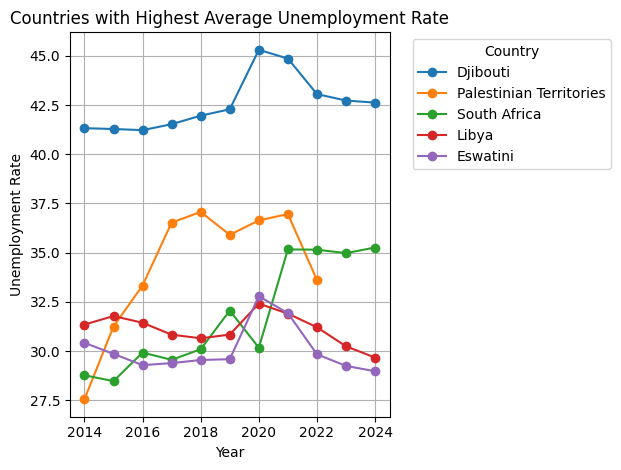

<Figure size 1000x800 with 0 Axes>

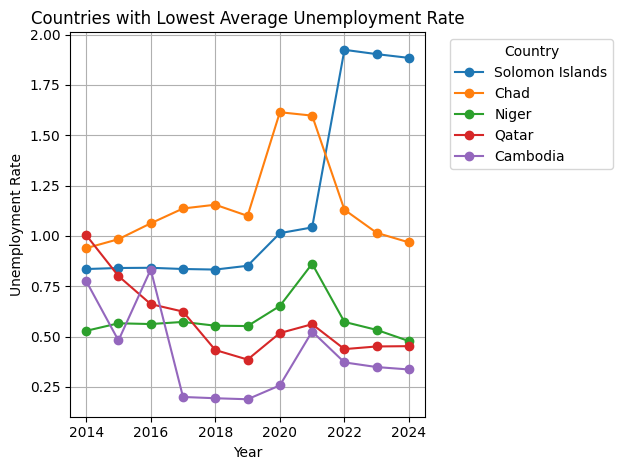

In [139]:
import matplotlib.pyplot as plt


average_unemployment_rate = country_group.mean(axis=1)


sorted_countries = average_unemployment_rate.sort_values(ascending=False)


top_countries_highest = sorted_countries.head(5)  
top_countries_lowest = sorted_countries.tail(5)


df_top_countries_highest = country_group.loc[top_countries_highest.index]
df_top_countries_highest_transposed = df_top_countries_highest.transpose()

plt.figure(figsize=(10, 8))
ax1 = df_top_countries_highest_transposed.plot(marker='o')
plt.title('Countries with Highest Average Unemployment Rate')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()


df_top_countries_lowest = country_group.loc[top_countries_lowest.index]
df_top_countries_lowest_transposed = df_top_countries_lowest.transpose()

plt.figure(figsize=(10, 8))
ax2 = df_top_countries_lowest_transposed.plot(marker='o')
plt.title('Countries with Lowest Average Unemployment Rate')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()


C:\Users\amoha\AppData\Local\Temp\ipykernel_17820\1298521194.py:1: FutureWarning: The provided callable <function mean at 0x00000200E7930A40> is currently using DataFrame.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_value = country_group.agg(np.mean)


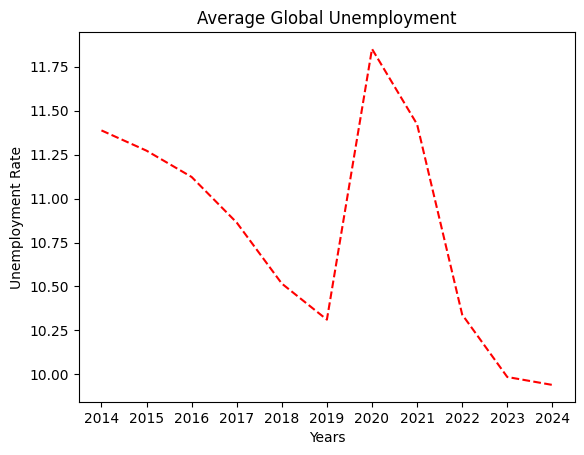

In [116]:

mean_value = country_group.agg(np.mean)
plt.plot(mean_value.index, mean_value.values, color='red', linestyle='--', label='Mean')
plt.title("Average Global Unemployment")
plt.xlabel('Years')
plt.ylabel('Unemployment Rate')
plt.show()

In [75]:
c = country_group.agg(np.mean)

C:\Users\amoha\AppData\Local\Temp\ipykernel_17820\4098568776.py:1: FutureWarning: The provided callable <function mean at 0x00000200E7930A40> is currently using DataFrame.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  c = country_group.agg(np.mean)


In [76]:
c

2014    11.387800
2015    11.272444
2016    11.122963
2017    10.863516
2018    10.516499
2019    10.311452
2020    11.851285
2021    11.422645
2022    10.340361
2023     9.985181
2024     9.940089
dtype: float64